In [ ]:
!nvidia-smi

Mon Feb  2 15:37:46 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             31W /   70W |     280MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Remove previous custom_data directory if it exists and then unzip images
!rm -rf /content/custom_data
!unzip -q /content/data.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2026-01-27 14:44:13--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2026-01-27 14:44:13 (59.1 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 366
Number of annotation files: 366
Images moving to train: 329
Images moving to validation: 37


In [ ]:
!pip install ultralytics

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 9
names:
- cars
- cracked tiles
- motorcycles
- potholes
- roads
- sidewalk
- steps
- vans
- walls


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11l.pt epochs=300 imgsz=640

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 191 layers, 25,286,251 parameters, 0 gradients, 86.6 GFLOPs

image 1/37 /content/data/validation/images/1a99fce4-20230702_104222_aug_jpg.rf.36e10faa84ca1a92c76e5f72b9c027cf.jpg: 480x480 3 cracked tiless, 30.8ms
image 2/37 /content/data/validation/images/23c006e8-img-442_jpg.rf.cee97e4366adc7444d699df40221581a.jpg: 480x480 1 potholes, 30.7ms
image 3/37 /content/data/validation/images/24210082-004_png_jpg.rf.76d21c6a0fcb1b85a04d53981e9ea04a0.jpg: 480x480 1 walls, 30.7ms
image 4/37 /content/data/validation/images/3123ae38-4d854db130547447_jpg.rf.3f95ed8e55deae2bee005a97ac06e09f.jpg: 480x480 4 motorcycless, 2 wallss, 30.7ms
image 5/37 /content/data/validation/images/37a94a9c-ef0e8d15-d8929c4e.jpg: 288x480 5 carss, 3 roadss, 1 walls, 57.4ms
image 6/37 /content/data/validation/images/430f8eb8-K1-1047-_jpg.rf.a0ab38aba6abbc7cfb674c4627a980f8.jpg: 480x480 1 walls, 23.3ms
image 7/37 /conten

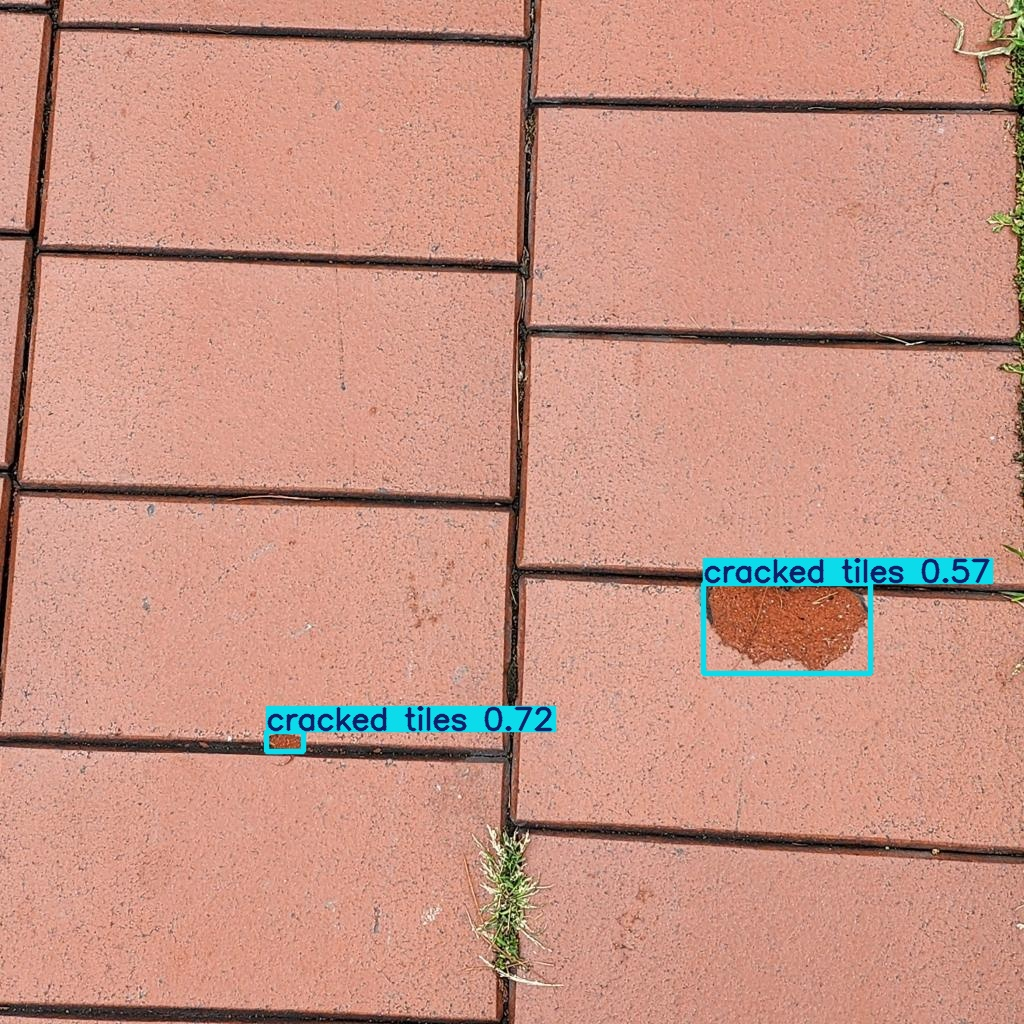

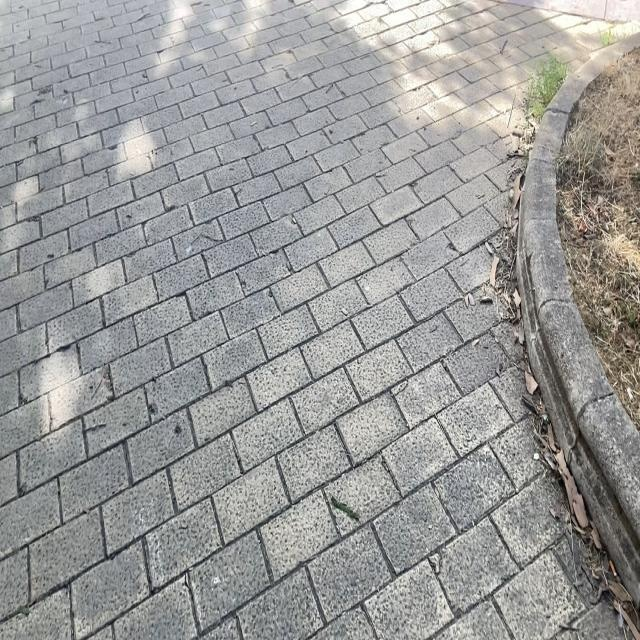

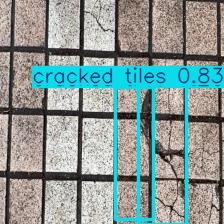

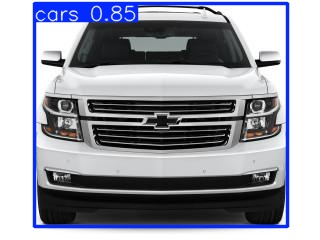

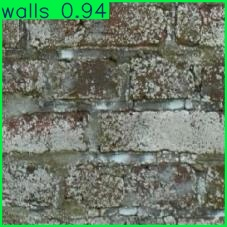

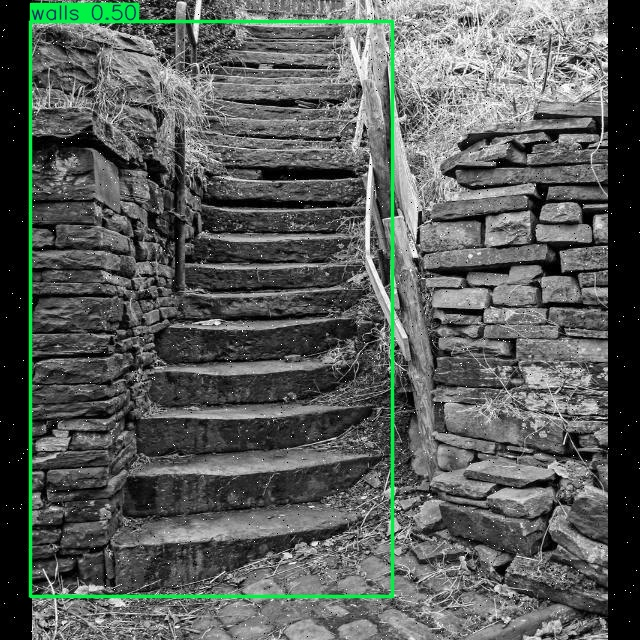

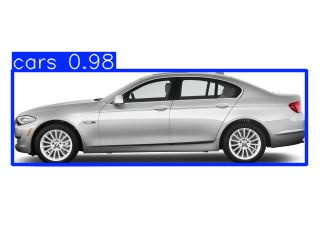

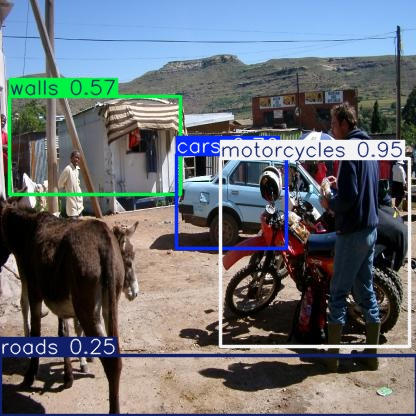

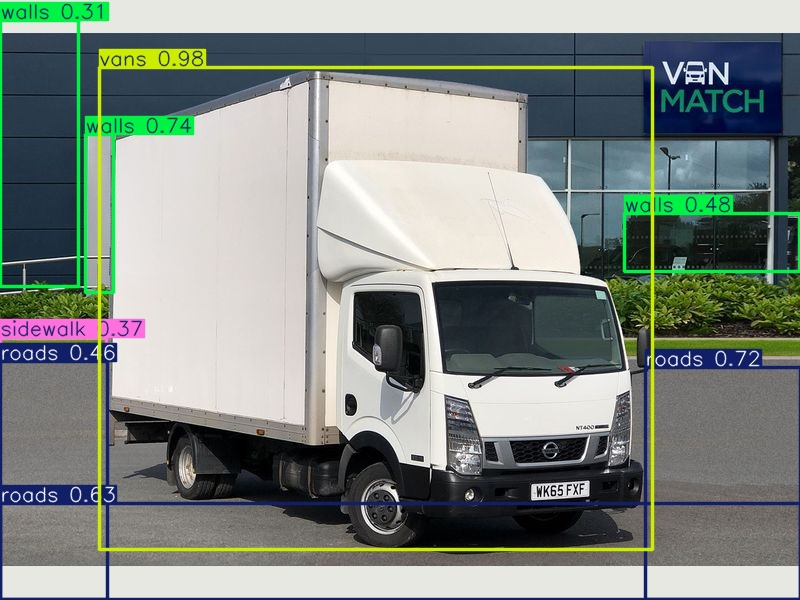

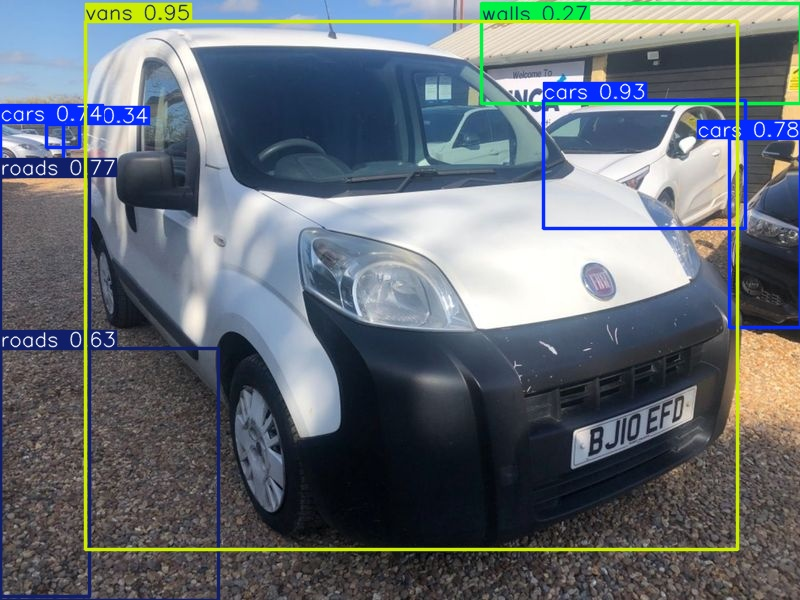

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/val_batch1_pred.jpg (deflated 11%)
  adding: train/BoxR_curve.png (deflated 8%)
  adding: train/results.csv (deflated 71%)
  adding: train/labels.jpg (deflated 19%)
  adding: train/args.yaml (deflated 53%)
  adding: train/confusion_matrix.png (deflated 23%)
  adding: train/val_batch0_labels.jpg (deflated 11%)
  adding: train/train_batch2.jpg (deflated 2%)
  adding: train/val_batch1_labels.jpg (deflated 11%)
  adding: train/BoxF1_curve.png (deflated 5%)
  adding: train/val_batch0_pred.jpg (deflated 10%)
  adding: train/train_batch1.jpg (deflated 4%)
  adding: train/train_batch0.jpg (deflated 2%)
  adding: train/BoxP_curve.png (deflated 6%)
  adding: train/results.png (deflated 5%)
  adding: train/confusion_matrix_normalized.png (deflated 18%)
  adding: train/BoxP

In [ ]:
# You can download the model from this code
from google.colab import files

files.download('/content/my_model.zip')

ثم شغل كل الخانات من هنا Files قم برفع الملفات فى ***********

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics

In [ ]:
# 1. فك ضغط الموديل (my_model.zip) للوصول إلى best.pt
!rm -rf /content/model_files
!unzip -q /content/my_model.zip -d /content/model_files

# 2. فك ضغط صور الـ Validation في مجلد منفصل
!rm -rf /content/validation_data
!unzip -q /content/validation.zip -d /content/validation_data

# 3. تشغيل التوقع (Predict)
!yolo detect predict \
model=/content/model_files/train/weights/best.pt \
source=/content/validation_data \
save=True

# 4. لعرض الصور واحدة تلو الأخرى
import glob
import os
from IPython.display import Image, display

# تحديد أحدث مجلد نتائج
try:
    save_dir = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
    predicted_images = sorted(glob.glob(os.path.join(save_dir, '*.*')))

    if not predicted_images:
        print("لم يتم العثور على صور معالجة.")
    else:
        print(f"عرض النتائج من: {save_dir}\n")

        for img_path in predicted_images:
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                # طباعة اسم الصورة أولاً
                print(f" نتيجة الفحص لـ: {os.path.basename(img_path)}")

                # عرض الصورة المكتشفة
                display(Image(filename=img_path, width=800))

                # إضافة سطر فاصل لترتيب العرض
                print("-" * 80)

except ValueError:
    print("خطأ: لم يتم العثور على مخرجات. تأكد من تشغيل أمر التوقع أولاً.")

In [ ]:
import cv2
import os
import glob
from ultralytics import YOLO
from IPython.display import display, Javascript
from base64 import b64encode

# 1. فك الضغط (لن يتم إلا إذا لم يكن موجوداً لتوفير الوقت)
if not os.path.exists('/content/model_files'):
    print("--- فك ضغط الموديل ---")
    !unzip -q /content/my_model.zip -d /content/model_files

# 2. تحميل الموديل وتجهيز الفيديو
model_path = glob.glob('/content/model_files/**/best.pt', recursive=True)[0]
model = YOLO(model_path)
video_path = "/content/test_video.mp4"
cap = cv2.VideoCapture(video_path)

# 3. إنشاء حاوية العرض
display(Javascript('''
    if(!document.getElementById('video_stream')){
        var img = document.createElement('img');
        img.id = 'video_stream';
        img.style.width = '700px';
        img.style.border = '3px solid #e74c3c';
        document.body.appendChild(img);
    }
'''))

def update_display(frame):
    _, buffer = cv2.imencode('.jpg', frame, [cv2.IMWRITE_JPEG_QUALITY, 75]) # جودة 75 لسرعة النقل
    byte_data = b64encode(buffer).decode('utf-8')
    js_code = f"document.getElementById('video_stream').src = 'data:image/jpeg;base64,{byte_data}';"
    display(Javascript(js_code))

# 4. المعالجة السريعة
print("--- بدء المعالجة السريعة (Turbo Mode) ---")
try:
    while cap.isOpened():
        success, frame = cap.read()
        if not success: break

        # تصغير حجم الإطار قليلاً لزيادة السرعة (Resize)
        frame_resized = cv2.resize(frame, (640, 360))

        # التنبؤ السريع
        results = model.predict(frame_resized, conf=0.25, device=0, verbose=False, half=True) # half=True للـ GPU

        # تحديث العرض
        update_display(results[0].plot())

    cap.release()
    print("--- تم الانتهاء ---")

except Exception as e:
    if 'cap' in locals(): cap.release()
    print(f"توقف: {e}")